# Importing and Installation

In [ ]:
!pip install shap lime scorecardpy
!pip install -U xgboost

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, auc, roc_curve, f1_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lime import lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=004a1a7156c52d8291ddd39d7cb9819030ed66d7d25e3c7a23b4a57e22d74064
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60629 sha256=a458318bd3ae06e37173107110fcd8b241bb302848c263d03eedb72977ccdac8
  Stored in directory: /root/.cache/pip/wheels/9f/d8/4e/61a6f4e78fe6700f66b699ab38377f0aa5b33e3ef55751ba38
Successfully built lime scorecardpy


In [ ]:
df = pd.read_csv('../data/cs-training.csv')
test_df = pd.read_csv('../data/cs-test.csv')
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (150000, 12)


Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

# Basic Pre-Processing

In [ ]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# Basic stats
df.describe().T

Missing values per column:
 Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


count          mean           std  \
Unnamed: 0                            150000.0  75000.500000  43301.414527   
SeriousDlqin2yrs                      150000.0      0.066840      0.249746   
RevolvingUtilizationOfUnsecuredLines  150000.0      6.048438    249.755371   
age                                   150000.0     52.295207     14.771866   
NumberOfTime30-59DaysPastDueNotWorse  150000.0      0.421033      4.192781   
DebtRatio                             150000.0    353.005076   2037.818523   
MonthlyIncome                         120269.0   6670.221237  14384.674215   
NumberOfOpenCreditLinesAndLoans       150000.0      8.452760      5.145951   
NumberOfTimes90DaysLate               150000.0      0.265973      4.169304   
NumberRealEstateLoansOrLines          150000.0      1.018240      1.129771   
NumberOfTime60-89DaysPastDueNotWorse  150000.0      0.240387      4.155179   
NumberOfDependents                    146076.0      0.757222      1.115086   

                                      min           25%           50%  \
Unnamed: 0                            1.0  37500.750000  75000.500000   
SeriousDlqin2yrs                      0.0      0.000000      0.000000   
RevolvingUtilizationOfUnsecuredLines  0.0      0.029867      0.154181   
age                                   0.0     41.000000     52.000000   
NumberOfTime30-59DaysPastDueNotWorse  0.0      0.000000      0.000000   
DebtRatio                             0.0      0.175074      0.366508   
MonthlyIncome                         0.0   3400.000000   5400.000000   
NumberOfOpenCreditLinesAndLoans       0.0      5.000000      8.000000   
NumberOfTimes90DaysLate               0.0      0.000000      0.000000   
NumberRealEstateLoansOrLines          0.0      0.000000      1.000000   
NumberOfTime60-89DaysPastDueNotWorse  0.0      0.000000      0.000000   
NumberOfDependents                    0.0      0.000000      0.000000   

                                                75%        max  
Unnamed: 0                            112500.250000   150000.0  
SeriousDlqin2yrs                           0.000000        1.0  
RevolvingUtilizationOfUnsecuredLines       0.559046    50708.0  
age                                       63.000000      109.0  
NumberOfTime30-59DaysPastDueNotWorse       0.000000       98.0  
DebtRatio                                  0.868254   329664.0  
MonthlyIncome                           8249.000000  3008750.0  
NumberOfOpenCreditLinesAndLoans           11.000000       58.0  
NumberOfTimes90DaysLate                    0.000000       98.0  
NumberRealEstateLoansOrLines               2.000000       54.0  
NumberOfTime60-89DaysPastDueNotWorse       0.000000       98.0  
NumberOfDependents                         1.000000       20.0

In [ ]:
df = df.rename(columns={
    'Unnamed: 0': 'ID',
    'SeriousDlqin2yrs': 'Target',
    'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
    'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
    'DebtRatio': 'DebtRatio',
    'MonthlyIncome': 'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
    'NumberOfTimes90DaysLate': 'Late90',
    'NumberRealEstateLoansOrLines': 'PropLines',
    'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
    'NumberOfDependents': 'Deps'
})

test_df = test_df.rename(columns={
    'Unnamed: 0': 'ID',
    'SeriousDlqin2yrs': 'Target',
    'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
    'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
    'DebtRatio': 'DebtRatio',
    'MonthlyIncome': 'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
    'NumberOfTimes90DaysLate': 'Late90',
    'NumberRealEstateLoansOrLines': 'PropLines',
    'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
    'NumberOfDependents': 'Deps'
})

# **EDA**

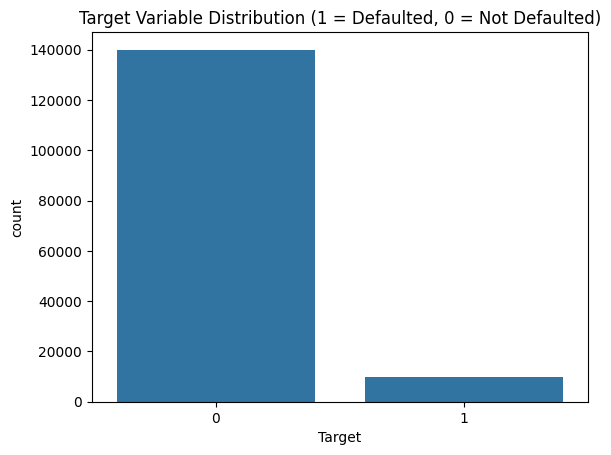

Target
0    0.93316
1    0.06684
Name: proportion, dtype: float64

In [ ]:
sns.countplot(x='Target', data=df)
plt.title('Target Variable Distribution (1 = Defaulted, 0 = Not Defaulted)')
plt.show()

df['Target'].value_counts(normalize=True)

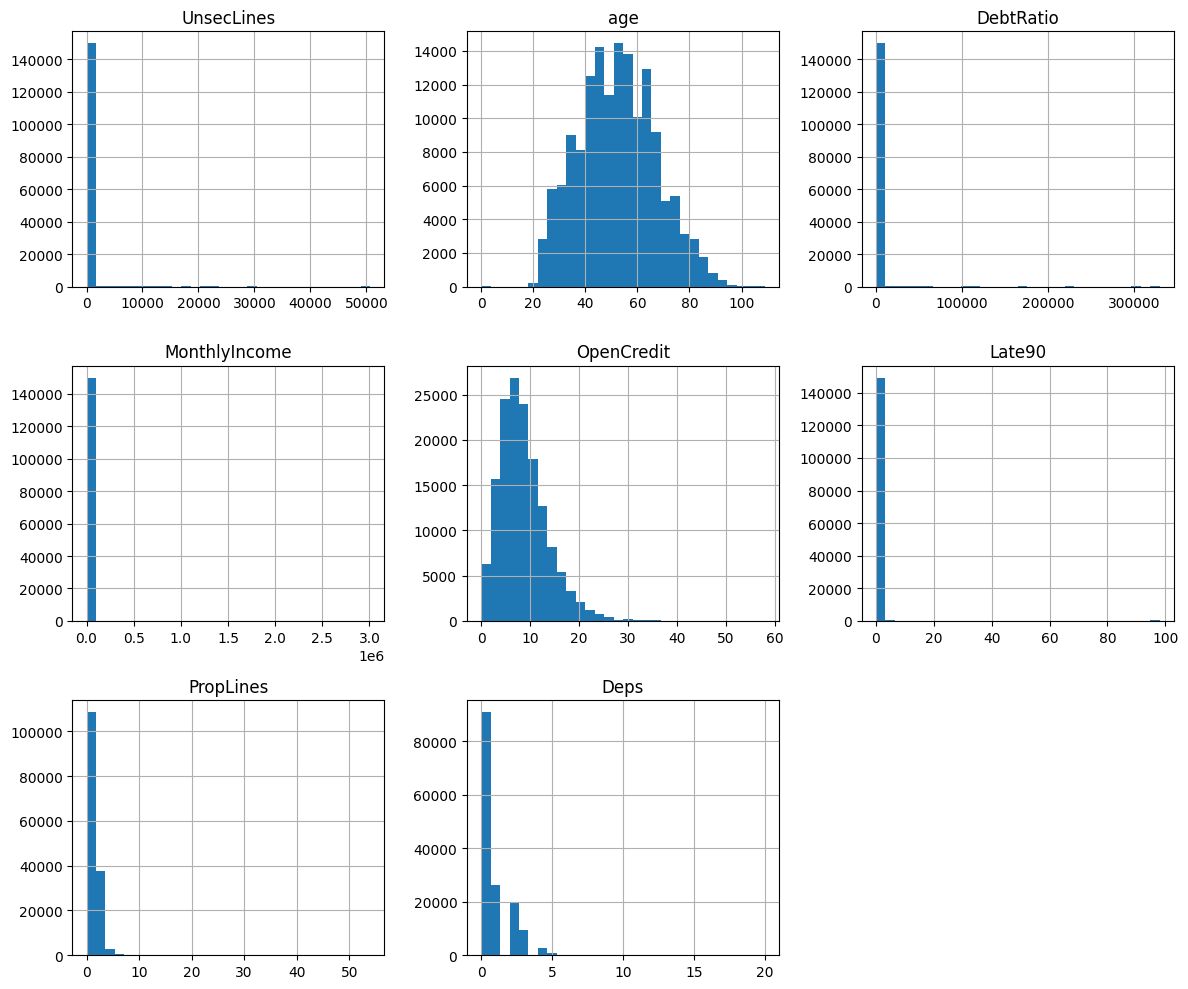

In [ ]:
#Feature level exploration
num_cols = ['UnsecLines', 'age', 'DebtRatio',
             'MonthlyIncome', 'OpenCredit',
             'Late90', 'PropLines',
             'Deps', ]

df[num_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

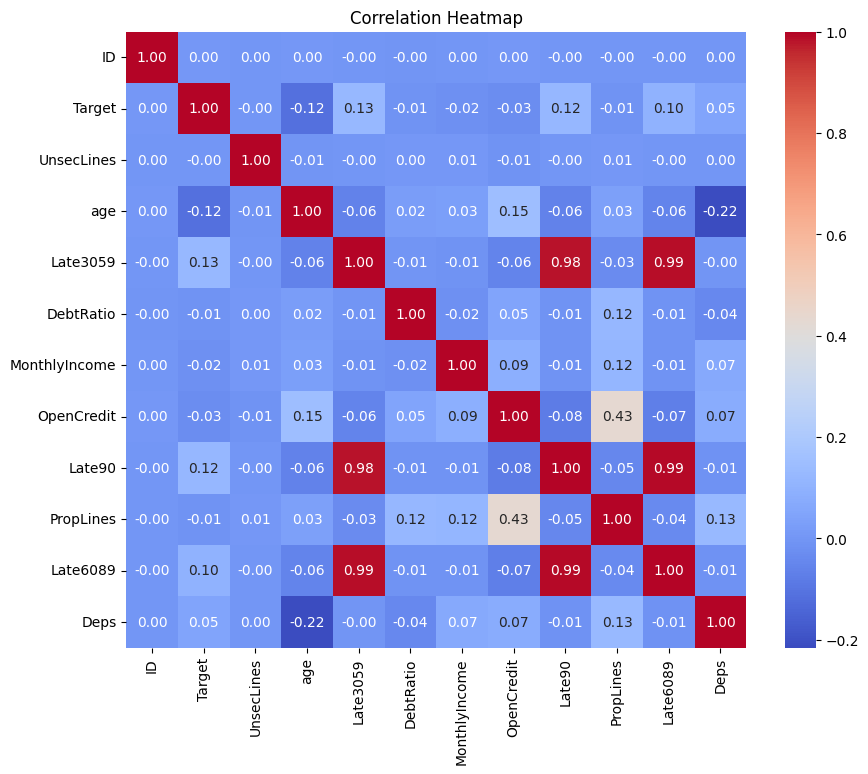

Target           1.000000
Late3059         0.125587
Late90           0.117175
Late6089         0.102261
Deps             0.046869
ID               0.002801
UnsecLines      -0.001802
PropLines       -0.007038
DebtRatio       -0.007602
MonthlyIncome   -0.017151
OpenCredit      -0.029669
age             -0.115386
Name: Target, dtype: float64

In [ ]:
# correlation matrix
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# specifically see correlation of features with Target
corr['Target'].sort_values(ascending=False)

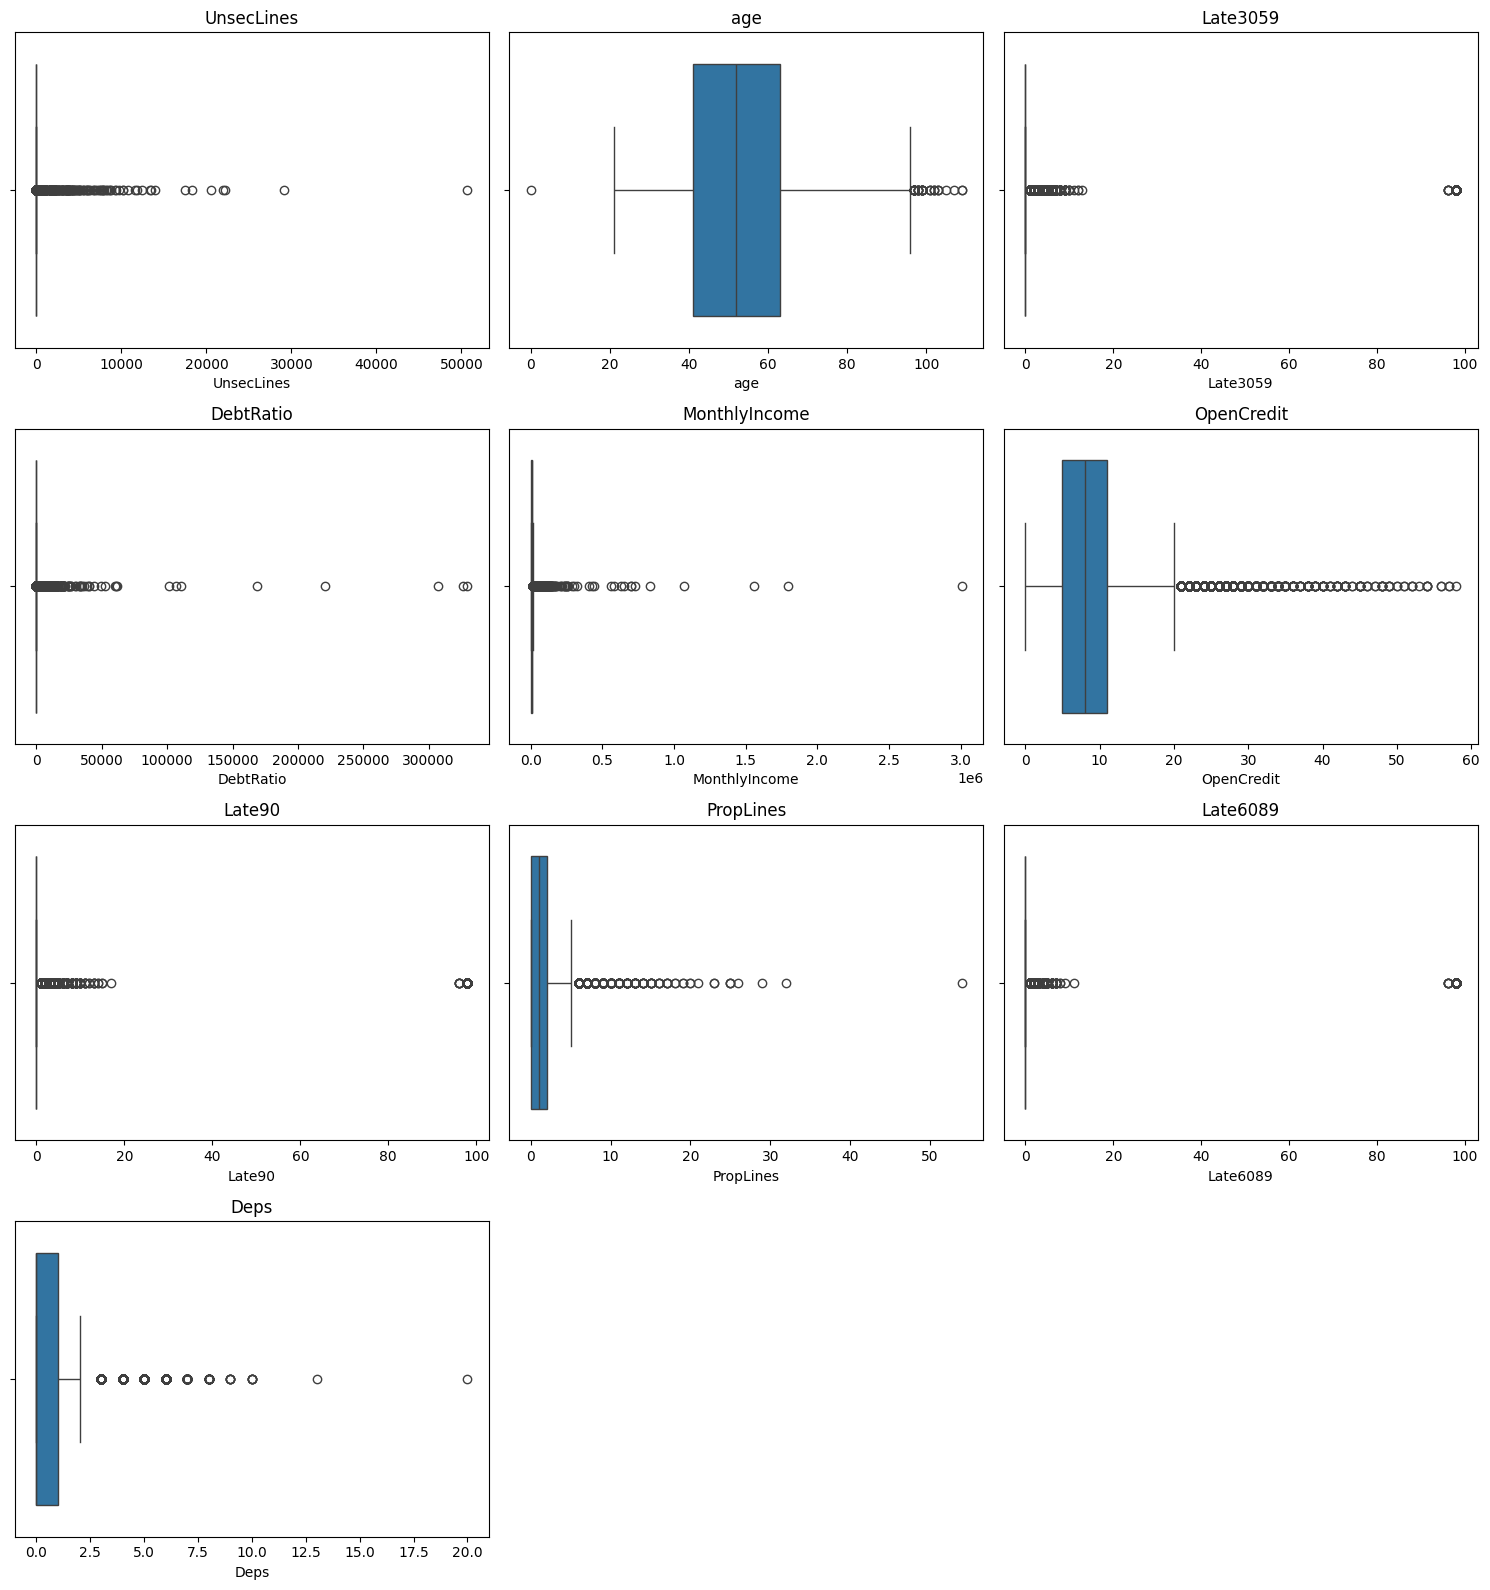

In [ ]:
# List of renamed numerical columns
numerical_columns = ['UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
                     'OpenCredit', 'Late90', 'PropLines', 'Late6089', 'Deps']
# Set grid size
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=col, data=df)
    plt.title(f'{col}')
    plt.tight_layout()

plt.show()

In [ ]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 ID               0
Target           0
UnsecLines       0
age              0
Late3059         0
DebtRatio        0
MonthlyIncome    0
OpenCredit       0
Late90           0
PropLines        0
Late6089         0
Deps             0
dtype: int64


# Pre-Procesing

In [ ]:
# Impute missing values
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['Deps'].fillna(df['Deps'].mode()[0], inplace=True)

# Verify
df.isnull().sum()

In [ ]:
df = df.drop(columns=['ID'])

In [ ]:
#capping(instead of IQR)
numerical_cols = ['UnsecLines', 'age', 'Late3059', 'DebtRatio', 'MonthlyIncome',
                  'OpenCredit', 'Late90', 'PropLines', 'Late6089', 'Deps']

# Fixed Cap for Count Variables (Delinquencies and Dependents)
# Capping at 10 to limit the influence of high, often erroneous, counts
for col in ['Late3059', 'Late90', 'Late6089', 'Deps']:
    df[col] = df[col].clip(upper=10)

# Percentile Cap for Highly Skewed Financial Variables
# Capping at the 99.5th percentile to retain most data while managing extremes
for col in ['MonthlyIncome', 'DebtRatio', 'UnsecLines']:
    p99_5 = df[col].quantile(0.995)
    df[col] = df[col].clip(upper=p99_5)

In [ ]:
# Apply log(1 + x) transformation to normalize the distribution of skewed features
# Applied to only these 3 because of continous and large data, others are not continous
# and some have integer counts so appling log is not really req

for col in ['MonthlyIncome', 'DebtRatio', 'UnsecLines']:
    df[col + '_log'] = np.log1p(df[col])

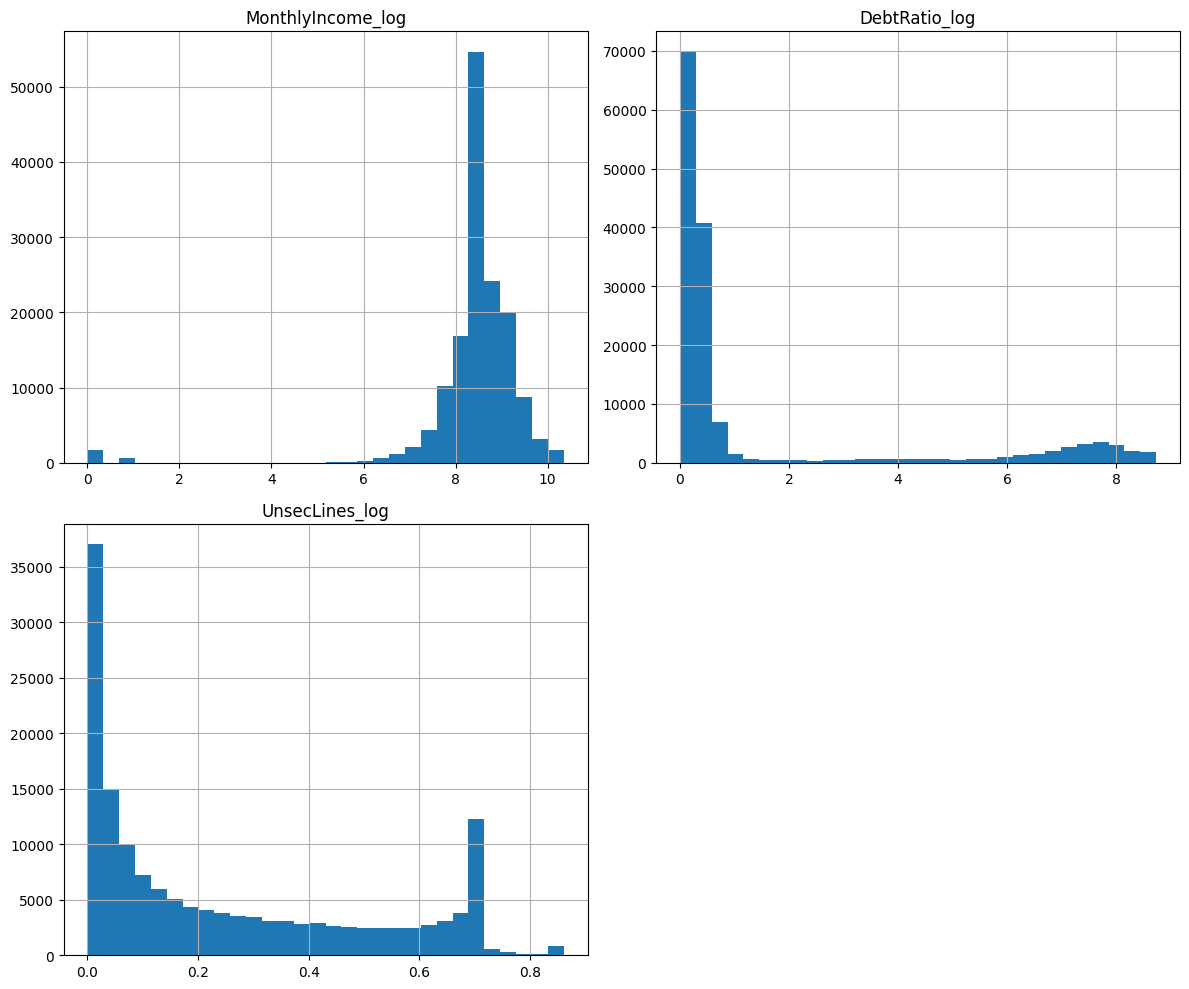

In [ ]:
num_cols = ['MonthlyIncome_log', 'DebtRatio_log', 'UnsecLines_log']

df[num_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

Monthly income now looks good, but debt ratio and unseclines are now bimodal, which isnt really good for linear regression, hence will try diferent method for it

In [ ]:
# Since having the original columns which were skewed would be redundant and confuse the model
df = df.drop(columns=['MonthlyIncome', 'DebtRatio', 'UnsecLines'])

In [ ]:
df.head()

Target  age  Late3059  OpenCredit  Late90  PropLines  Late6089  Deps  \
0       1   45         2          13       0          6         0   2.0   
1       0   40         0           4       0          0         0   1.0   
2       0   38         1           2       1          0         0   0.0   
3       0   30         0           5       0          0         0   0.0   
4       0   49         1           7       0          1         0   0.0   

   MonthlyIncome_log  DebtRatio_log  UnsecLines_log  
0           9.118335       0.589442        0.568789  
1           7.863651       0.115002        0.671490  
2           8.020599       0.081684        0.505721  
3           8.101981       0.035415        0.210107  
4          10.349807       0.024620        0.645657

In [ ]:
# Features and target
X = df.drop(columns=['Target'])  # all predictors
y = df['Target']                 # target variable

# Train/test split (80/20) with stratification because target is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (120000, 10)
X_test: (30000, 10)
y_train: (120000,)
y_test: (30000,)


In [ ]:
scaler = StandardScaler()

# 1. Fit scaler ONLY on the training features and transform
X_train_scaled = scaler.fit_transform(X_train)

# 2. Transform the test features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Put back into DataFrame for readability, ensuring the original index is kept
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled.head()

age  Late3059  OpenCredit    Late90  PropLines  Late6089  \
57836   0.657506 -0.325458   -0.671428 -0.170483  -0.016033 -0.155256   
132895  1.402198 -0.325458   -0.477692 -0.170483  -0.016033 -0.155256   
27981  -1.373472 -0.325458   -0.090221 -0.170483  -0.898607 -0.155256   
37852   0.522107 -0.325458   -0.671428 -0.170483  -0.898607 -0.155256   
103813  0.522107 -0.325458    0.297250 -0.170483  -0.016033 -0.155256   

            Deps  MonthlyIncome_log  DebtRatio_log  UnsecLines_log  
57836   1.141540           0.127694       2.290679       -0.552433  
132895 -0.666816          -0.165848      -0.425548       -0.955244  
27981   1.141540          -0.184520      -0.506579       -0.208668  
37852  -0.666816           0.127694       1.244721        1.797094  
103813 -0.666816          -0.363301      -0.312046       -0.156068

# Logistic Regression

In [ ]:
model_lr = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

# 2. Train the model on the scaled training data
model_lr.fit(X_train_scaled, y_train)

# 3. Predict probabilities on the test set
# For credit risk, we always look at the probability of the positive class (index 1)
y_proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

# 4. Predict class labels using the default threshold (0.5)
y_pred_default_thresh = model_lr.predict(X_test_scaled)

# 5. Evaluate the baseline metrics
auc_score = roc_auc_score(y_test, y_proba_lr)
f1_score_default = f1_score(y_test, y_pred_default_thresh)
gini = 2 * auc_score - 1
print(f" Training Complete.")
print("-" * 30)
print(f"AUC Score: {auc_score:.4f}")
print(f"GINI: {gini:.4f}")
print(f"F1 Score(Default Threshold): {f1_score_default:.4f}")
print("-" * 30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_default_thresh))
print("-" * 30)
print("Classification Report:\n")
print(classification_report(y_test, y_pred_default_thresh, zero_division=0))

 Training Complete.
------------------------------
AUC Score: 0.8578
GINI: 0.7156
F1 Score(Default Threshold): 0.3287
------------------------------
Confusion Matrix:
[[22276  5719]
 [  486  1519]]
------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     27995
           1       0.21      0.76      0.33      2005

    accuracy                           0.79     30000
   macro avg       0.59      0.78      0.60     30000
weighted avg       0.93      0.79      0.84     30000



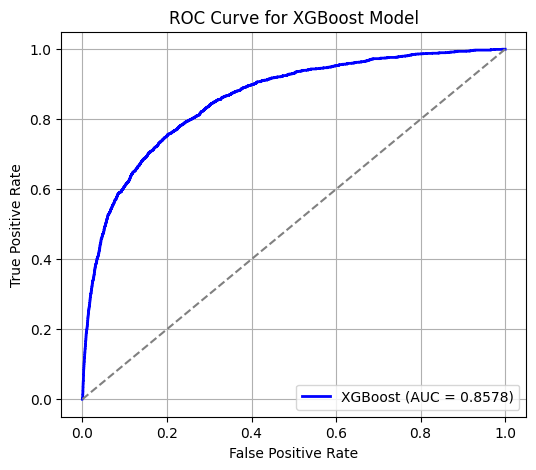

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
auc_score_lr = roc_auc_score(y_test, y_proba_lr)

# Create the plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'XGBoost (AUC = {auc_score_lr:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal line

# Labeling
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

/tmp/ipython-input-3521036177.py:7: RuntimeWarning: invalid value encountered in divide
  fscores_lr = 2 * (precision_lr[:-1] * recall_lr[:-1]) / (precision_lr[:-1] + recall_lr[:-1])


 Logistic Regression Optimal F1 Score: 0.4437
 Logistic Regression Threshold: 0.7085


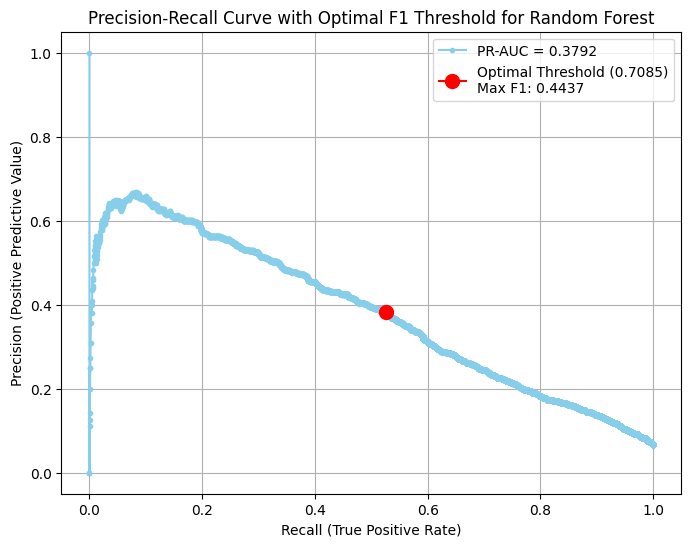

In [ ]:
# y_proba_rf is the array of probabilities generated from your Random Forest model
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)

# --- 2. Find the Optimal F1 Score and Threshold ---
# Exclude the last point to avoid unstable F1 calculation
fscores_lr = 2 * (precision_lr[:-1] * recall_lr[:-1]) / (precision_lr[:-1] + recall_lr[:-1])
fscores_lr = np.nan_to_num(fscores_lr, nan=0.0, posinf=0.0, neginf=0.0)

# Find the index of the maximum F1 Score
ix_lr = np.argmax(fscores_lr)
best_f1_lr = fscores_lr[ix_lr]
best_threshold_lr = thresholds_lr[ix_lr]
optimal_recall_lr = recall_lr[ix_lr]
optimal_precision_lr = precision_lr[ix_lr]

# --- 5. Print Optimal F1 and Threshold ---
print(f" Logistic Regression Optimal F1 Score: {best_f1_lr:.4f}")
print(f" Logistic Regression Threshold: {best_threshold_lr:.4f}")

# --- 3. Plot the Precision-Recall Curve ---
plt.figure(figsize=(8, 6))

# Plot the PR Curve
plt.plot(recall_lr, precision_lr, marker='.', color='skyblue',
         label=f'PR-AUC = {pr_auc_lr:.4f}')

# Mark the Optimal Threshold Point
plt.plot(optimal_recall_lr, optimal_precision_lr, marker='o', markersize=10, color='red',
         label=f'Optimal Threshold ({best_threshold_lr:.4f})\nMax F1: {best_f1_lr:.4f}')

# Set Labels and Title
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('Precision-Recall Curve with Optimal F1 Threshold for Random Forest')
plt.grid(True)
plt.legend()
plt.show()


# XGBOOST

In [ ]:
from xgboost import XGBClassifier

# 1. Calculate the Imbalance Ratio
# This tells XGBoost how much more important the positive class (1/Default) is.
count_neg = y_train.value_counts()[0]
count_pos = y_train.value_counts()[1]
scale_pos_weight = count_neg / count_pos
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

# 2. Initialize the XGBoost Classifier
# We use the scaled_pos_weight to manage imbalance directly.
model_xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_estimators=150,
    learning_rate=0.1,
    scale_pos_weight = scale_pos_weight,  # CRUCIAL for imbalance
    base_score=0.5
)

# 3. Train the Model (using the scaled training data)
# X_train_scaled is preferred for consistency, though unscaled features also work for XGBoost.
model_xgb.fit(X_train_scaled, y_train)

# 4. Predict Probabilities and Labels on the Test Set
y_proba_xgb = model_xgb.predict_proba(X_test_scaled)[:, 1]
y_pred_xgb_default = model_xgb.predict(X_test_scaled)

# 5. Evaluate the Baseline Metrics
auc_score_xgb = roc_auc_score(y_test, y_proba_xgb)
f1_score_xgb_default = f1_score(y_test, y_pred_xgb_default)

print("\n--- XGBoost Baseline Model Summary ---")
print(f"AUC Score: {auc_score_xgb:.4f}")
print(f"F1 Score(Default Threshold): {f1_score_xgb_default:.4f}")
print("-" * 50)
print("Classification Report (0.5 Threshold):\n", classification_report(y_test, y_pred_xgb_default, zero_division=0))

Calculated scale_pos_weight: 13.96


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:45:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Baseline Model Summary ---
AUC Score: 0.8637
F1 Score(Default Threshold): 0.3452
--------------------------------------------------
Classification Report (0.5 Threshold):
               precision    recall  f1-score   support

           0       0.98      0.82      0.89     27995
           1       0.22      0.75      0.35      2005

    accuracy                           0.81     30000
   macro avg       0.60      0.78      0.62     30000
weighted avg       0.93      0.81      0.85     30000



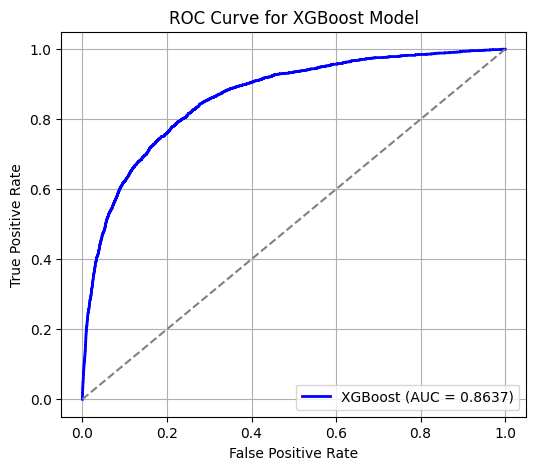

In [ ]:
# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
auc_score_xgb = roc_auc_score(y_test, y_proba_xgb)

# Create the plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'XGBoost (AUC = {auc_score_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal line

# Labeling
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Optimal F1 Score @ optimal threshold: 0.4429
Optimal Threshold : 0.7460


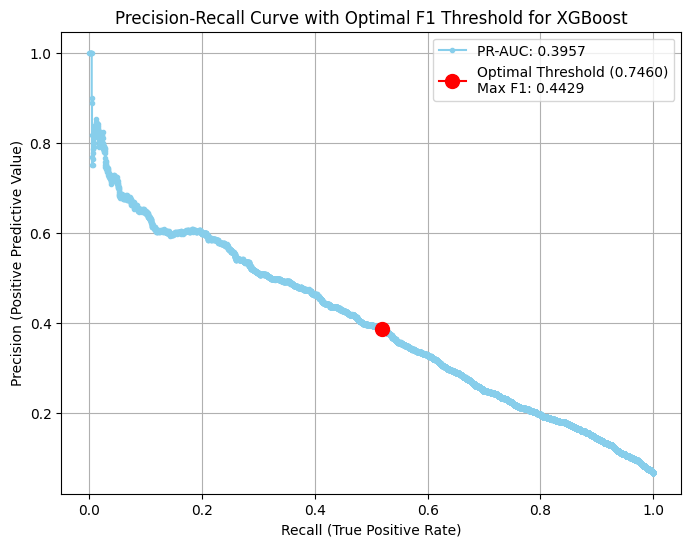

In [ ]:
# y_proba_xgb is the array of probabilities generated from your XGBoost model
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

# 2. Find the Optimal F1 Score and Threshold
# Note: We exclude the last point of precision/recall which corresponds to
# a threshold of 1.0 (where the F1 calculation is unstable or 0/0).
fscores_xgb = 2 * (precision_xgb[:-1] * recall_xgb[:-1]) / (precision_xgb[:-1] + recall_xgb[:-1])
fscores_xgb = np.nan_to_num(fscores_xgb, nan=0.0, posinf=0.0, neginf=0.0)

# Find the index of the maximum F1 Score
ix_xgb = np.argmax(fscores_xgb)
best_f1_xgb = fscores_xgb[ix_xgb]
best_threshold_xgb = thresholds_xgb[ix_xgb]
optimal_recall_xgb = recall_xgb[ix_xgb]
optimal_precision_xgb = precision_xgb[ix_xgb]

print(f"Optimal F1 Score @ optimal threshold: {best_f1_xgb:.4f}")
print(f"Optimal Threshold : {best_threshold_xgb:.4f}")

# --- 3. Plot the Precision-Recall Curve ---
plt.figure(figsize=(8, 6))

# Plot the PR Curve
plt.plot(recall_xgb, precision_xgb, marker='.',
         label=f'PR-AUC: {pr_auc_xgb:.4f}',
         color='skyblue')

# Mark the Optimal Threshold Point
plt.plot(optimal_recall_xgb, optimal_precision_xgb, marker='o',
         markersize=10, color='red',
         label=f'Optimal Threshold ({best_threshold_xgb:.4f})\nMax F1: {best_f1_xgb:.4f}')

# Set Labels and Title
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('Precision-Recall Curve with Optimal F1 Threshold for XGBoost')
plt.grid(True)
plt.legend()
plt.show()

# Random Forest

In [ ]:
# 1. Initialize the Random Forest
model_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    max_depth=10,
    n_jobs=-1
)

# 2. Train the model
model_rf.fit(X_train_scaled, y_train)

# 3. Predict using default threshold (0.5)
y_pred_rf_default = model_rf.predict(X_test_scaled)

# 4. Evaluate
auc_score_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test_scaled)[:, 1])
f1_positive = f1_score(y_test, y_pred_rf_default, pos_label=1)

print("\n--- Random Forest Model Summary (Default Threshold 0.5) ---")
print(f"AUC Score: {auc_score_rf:.4f}")
print(f"F1 Score: {f1_positive:.4f}")
print("-" * 50)
print("Classification Report:\n", classification_report(y_test, y_pred_rf_default, zero_division=0))



--- Random Forest Model Summary (Default Threshold 0.5) ---
AUC Score: 0.8627
F1 Score: 0.3525
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     27995
           1       0.23      0.73      0.35      2005

    accuracy                           0.82     30000
   macro avg       0.60      0.78      0.62     30000
weighted avg       0.93      0.82      0.86     30000



/tmp/ipython-input-1587621340.py:10: RuntimeWarning: invalid value encountered in divide
  fscores_rf = 2 * (precision_rf[:-1] * recall_rf[:-1]) / (precision_rf[:-1] + recall_rf[:-1])


 Random Forest Optimal F1 Score: 0.4294
 Random Forest Optimal Threshold: 0.6686


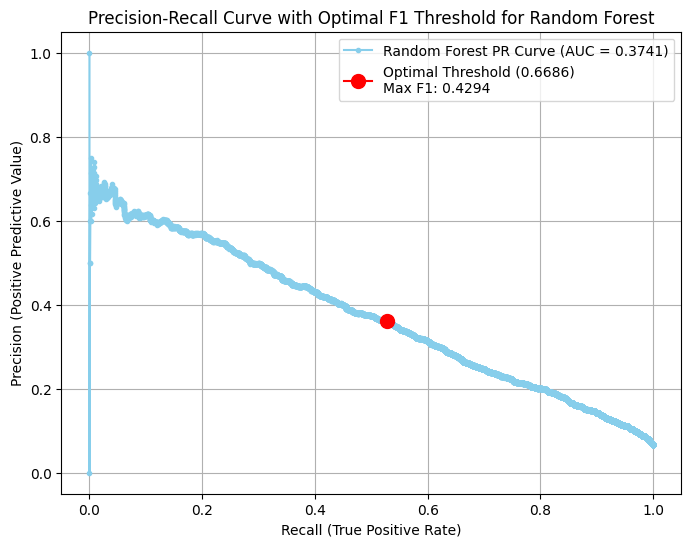

In [ ]:
# y_proba_rf is the array of probabilities from your Random Forest model
y_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

# --- 2. Calculate Precision, Recall, and PR AUC ---
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

# --- 3. Find the Optimal F1 Score and Threshold ---
# Exclude last point corresponding to threshold=1.0
fscores_rf = 2 * (precision_rf[:-1] * recall_rf[:-1]) / (precision_rf[:-1] + recall_rf[:-1])
fscores_rf = np.nan_to_num(fscores_rf, nan=0.0, posinf=0.0, neginf=0.0)

# Index of maximum F1 score
ix_rf = np.argmax(fscores_rf)
best_f1_rf = fscores_rf[ix_rf]
best_threshold_rf = thresholds_rf[ix_rf]
optimal_recall_rf = recall_rf[ix_rf]
optimal_precision_rf = precision_rf[ix_rf]

# --- 5. Print Optimal F1 and Threshold ---
print(f" Random Forest Optimal F1 Score: {best_f1_rf:.4f}")
print(f" Random Forest Optimal Threshold: {best_threshold_rf:.4f}")

# --- 4. Plot the Precision-Recall Curve ---
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, marker='.',
         label=f'Random Forest PR Curve (AUC = {pr_auc_rf:.4f})',
         color='skyblue')

# Mark Optimal Threshold Point
plt.plot(optimal_recall_rf, optimal_precision_rf, marker='o',
         markersize=10, color='red',
         label=f'Optimal Threshold ({best_threshold_rf:.4f})\nMax F1: {best_f1_rf:.4f}')

# Labels and Title
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('Precision-Recall Curve with Optimal F1 Threshold for Random Forest')
plt.grid(True)
plt.legend()
plt.show()




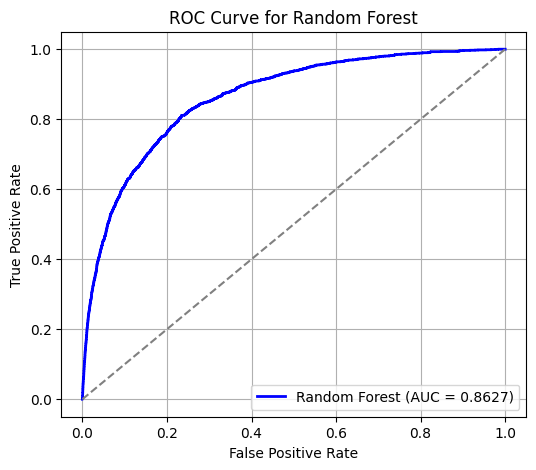

In [ ]:
# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
auc_score_rf = roc_auc_score(y_test, y_proba_rf)

# Create the plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'Random Forest (AUC = {auc_score_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal line

# Labeling
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

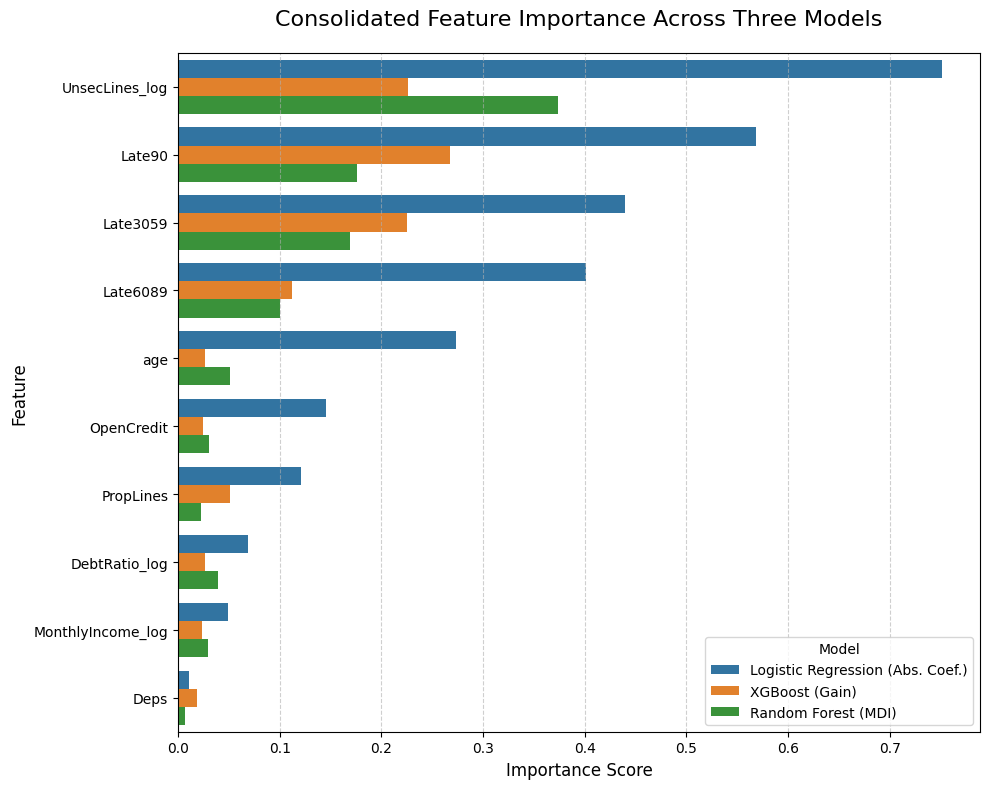

In [ ]:
import seaborn as sns

# --- Step 1: Extract and Label Importance Scores ---

features = X_train.columns

# Create initial DataFrames
df_lr = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(model_lr.coef_[0]),  # Absolute coefficients for LR
    'Model': 'Logistic Regression (Abs. Coef.)'
})

df_xgb = pd.DataFrame({
    'Feature': features,
    'Importance': model_xgb.feature_importances_,
    'Model': 'XGBoost (Gain)'
})

df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': model_rf.feature_importances_,
    'Model': 'Random Forest (MDI)'
})

#Step 2: Consolidate and Sort Data
df_consolidated = pd.concat([df_lr, df_xgb, df_rf], ignore_index=True)

# Sort features by their average importance across all models
feature_order = (
    df_consolidated
    .groupby('Feature')['Importance']
    .mean()
    .sort_values(ascending=False)
    .index
)
df_consolidated['Feature'] = pd.Categorical(
    df_consolidated['Feature'],
    categories=feature_order,
    ordered=True
)

# Step 3: Generate the Consolidated Plot
plt.figure(figsize=(10, 8))

sns.barplot(
    x='Importance',
    y='Feature',
    hue='Model',
    data=df_consolidated,
    palette=['#1f77b4', '#ff7f0e', '#2ca02c'],
    errorbar=None
)

plt.title('Feature Importance Across Three Models', fontsize=16, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend(title='Model', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# SHAP and LIME

ExactExplainer explainer: 1501it [13:51,  1.78it/s]


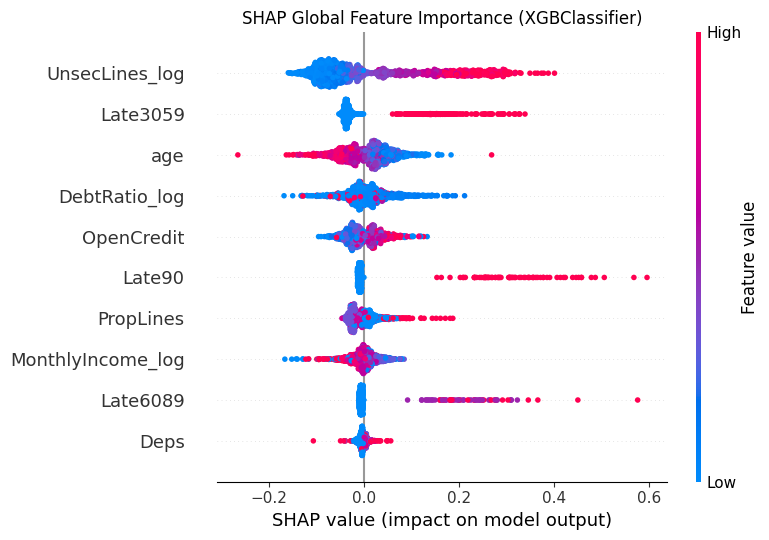

In [ ]:
# Convert scaled test data to DataFrame
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sample a subset to speed up computation (1000–1500 rows)
X_sample = X_test_df.sample(n=1500, random_state=42)

# Wrap your XGBClassifier in a callable returning probabilities for the positive class
model_callable = lambda X: model_xgb.predict_proba(X)[:, 1]

# Create SHAP explainer using the callable
explainer = shap.Explainer(model_callable, X_sample)

# Calculate SHAP values
shap_values = explainer(X_sample)

# Plot global feature importance
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values.values,  # numeric SHAP values
    features=X_sample,
    plot_type="dot",
    show=False
)
plt.title("SHAP Global Feature Importance (XGBClassifier)")
plt.tight_layout()
plt.show()


ExactExplainer explainer: 501it [04:12,  1.98it/s]


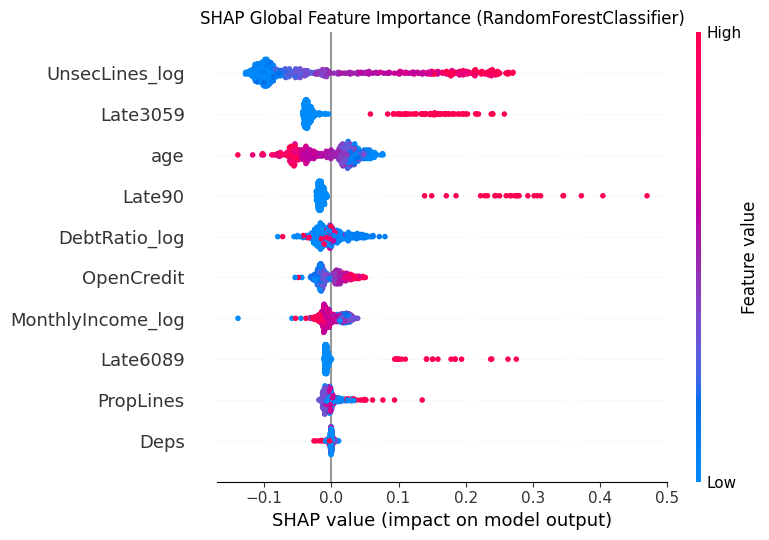

In [36]:
#SHAP for randomforest
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_sample_rf = X_test_df.sample(n=500, random_state=42)

model_callable_rf = lambda X: model_rf.predict_proba(X)[:, 1]
explainer_rf = shap.Explainer(model_callable_rf, X_sample_rf)
shap_values_rf = explainer_rf(X_sample_rf)

plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_rf.values,
    X_sample_rf,
    plot_type="dot",
    show=False
)
plt.title("SHAP Global Feature Importance (RandomForestClassifier)")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

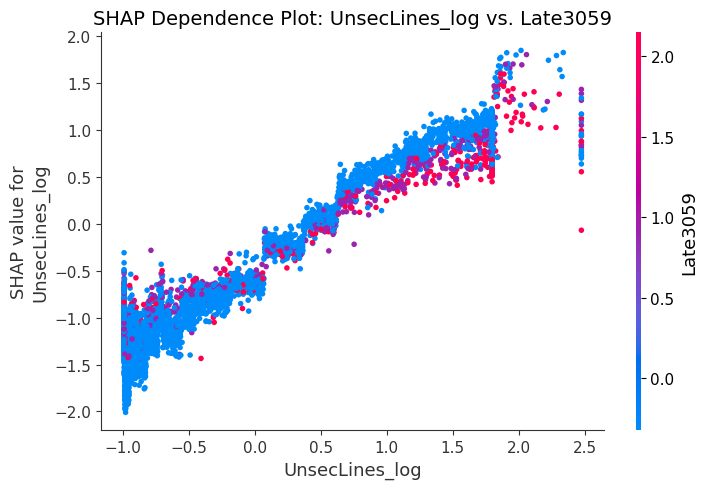

In [ ]:
# 1. Define the features to plot
main_feature = 'UnsecLines_log'
interaction_feature = 'Late3059'

# 2. Generate the Dependence Plot
# The plot shows how the SHAP value for the main feature changes based on its own value,
# with the color showing the value of the interaction feature.
plt.figure(figsize=(10, 6))
shap.dependence_plot(
    ind=main_feature,
    shap_values=shap_values,
    features=X_sample,
    interaction_index=interaction_feature,
    show=False
)
plt.title(f'SHAP Dependence Plot: {main_feature} vs. {interaction_feature}', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#Lime for Random forest coz shap aint working
from lime import lime_tabular

# 1. Prepare the Explainer

# LIME requires the training data to learn feature boundaries
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled), # LIME works best on NumPy arrays
    feature_names=X_train_scaled.columns.tolist(),
    class_names=['No Default (0)', 'Default (1)'],
    mode='classification',
    # A high kernel_width is recommended for credit risk/tabular data
    kernel_width=0.75
)

# 2. Select an Observation to Explain

# We'll explain the first observation in the test set (index 0)
# Use .iloc[0] to select the first row as a NumPy array (which LIME expects)
test_sample = X_test_scaled.iloc[0].values
true_label = y_test.iloc[0]

# 3. Define the Predict Function

# LIME needs the raw predict_proba function from your model
def rf_predict_proba(data):
    # model_rf is your trained Random Forest model
    return model_rf.predict_proba(data)

# 4. Generate the Explanation

# Generate the explanation for the test sample
explanation = explainer_lime.explain_instance(
    data_row=test_sample,
    predict_fn=rf_predict_proba,
    num_features=8 # Show the top 10 contributing features
)

#5. Visualize the Explanation

# Display the LIME plot in the notebook
print(f"\n--- LIME Local Explanation for Sample 0 (True Label: {true_label}) ---")
explanation.show_in_notebook(show_table=True)



--- LIME Local Explanation for Sample 0 (True Label: 0) ---


In [ ]:

# Get predictions using the optimal threshold
y_pred_tuned = (y_proba >= best_threshold_tuned).astype(int)
y_pred_series = pd.Series(y_pred_tuned, index=y_test.index)

# 1. Find the index of the first False Negative (Actual 1, Predicted 0)
# This is a customer who defaulted but the model wrongly predicted would not.
fn_index = y_test[(y_test == 1) & (y_pred_series == 0)].index[0]

# 2. Extract the feature values for this misclassified customer
instance_to_explain = X_test_scaled.loc[fn_index]

print("\n--- LIME Target Customer Found (LR False Negative) ---")

# 3. Initialize the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled.values,
    feature_names=X_train_scaled.columns.tolist(),
    class_names=['No Default (0)', 'Default (1)'],
    mode='classification',
    random_state=42
)

# 4. Define the Model's Predict Function for LIME
predict_fn = lambda x: model_lr.predict_proba(x)

# 5. Generate the Explanation
exp = explainer.explain_instance(
    data_row=instance_to_explain.values,
    predict_fn=predict_fn,
    num_features=8
)

# 6. Final Visualization
print("\n--- LIME Explanation for Misclassified Customer ---")
exp.show_in_notebook(show_table=True)


--- LIME Target Customer Found (LR False Negative) ---
Customer Index: 106446
Actual Outcome (Default): 1
Predicted Outcome (Non-Default): 0

--- LIME Explanation for Misclassified Customer ---
